In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
sample_rate = 16000
window_size_ms = 30 
window_size_samples =int(window_size_ms * (sample_rate / 1000))

window_stride_ms = 10
window_stride_samples = int(window_stride_ms * (sample_rate / 1000))

fft_length = 1024

In [4]:
window_stride_samples

160

In [5]:
sig = tf.placeholder(tf.float32, [None, sample_rate])

In [6]:
def log_mel_fb(sig,name=None):
    with tf.name_scope(name,"audio_processing",[sig]) as scope:
        stfts = tf.contrib.signal.stft(sig, frame_length=window_size_samples, frame_step=window_stride_samples,fft_length=1024)
        magnitude_spectrograms = tf.abs(stfts)
        # Warp the linear-scale, magnitude spectrograms into the mel-scale.
        num_spectrogram_bins = magnitude_spectrograms.shape[-1].value
        lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 98
        linear_to_mel_weight_matrix = tf.contrib.signal.linear_to_mel_weight_matrix(
          num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz,
          upper_edge_hertz)
        mel_spectrograms = tf.tensordot(magnitude_spectrograms, linear_to_mel_weight_matrix, 1)
        # Note: Shape inference for `tf.tensordot` does not currently handle this case.
        mel_spectrograms.set_shape(magnitude_spectrograms.shape[:-1].concatenate(linear_to_mel_weight_matrix.shape[-1:]))
        log_offset = 1e-6
        log_mel_spectrograms = tf.log(mel_spectrograms + log_offset)
        return log_mel_spectrograms
    

In [7]:
log_mels = log_mel_fb(sig)

In [8]:
log_mels.shape

TensorShape([Dimension(None), Dimension(98), Dimension(98)])

In [9]:
import matplotlib.pyplot as plt

In [10]:
import scipy.io.wavfile as sciwav

In [11]:
s,a = sciwav.read("train/audio/five/00b01445_nohash_1.wav")

In [12]:
a

array([ -13,  -51,  100, ...,  -44, -112,  102], dtype=int16)

In [13]:
a = a.reshape((1,-1))

In [14]:
sess = tf.InteractiveSession()

In [15]:
lmfb = sess.run(log_mels,{sig:a})

In [16]:
lmfb.shape

(1, 98, 98)

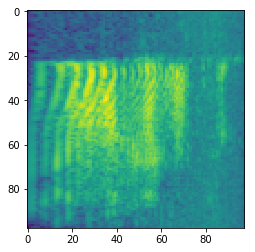

In [18]:
plt.imshow(lmfb.reshape((98,98)))

In [19]:
s,b= sciwav.read("train/audio/five/0cd323ec_nohash_0.wav")

In [20]:
lb = sess.run(log_mels,{sig:b.reshape((1,sample_rate))}).reshape((98,98))

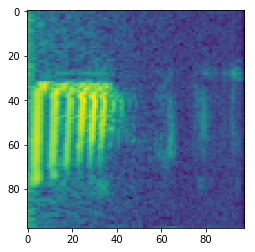

In [21]:
plt.imshow(lb)